<a href="https://colab.research.google.com/github/gabrielatoniolo/dab-dbt-repository/blob/main/Monitoring_analyst_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CloudWalk - Monitoring Analyst Test**


Steps


*   Data exploration in SQL on BigQuery
*   Graph plotation on Python
*   ChatGPT help on Python code



# **First task**
Analysis of anomaly behavior in number of sales of POS

**STEP 1 - Data exploration in SQL**

---
Calculate the percentage of growth in the number of sales compared to last month and today.

```
SELECT
  *,
  round((today-avg_last_month)/avg_last_month,2) as growth,
FROM
  `checkout-2`
```




**STEP 2 - Graph plotation in python**

---
CSV data to a DATAFRAME


In [4]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
#import pandas library
import pandas as pd

In [9]:
#read csv file and save in anomaly
anomaly1 = pd.read_csv("/content/drive/MyDrive/Monitoring Analyst/anomaly_checkout_1.csv")

In [10]:
#read csv file and save in anomaly
anomaly = pd.read_csv("/content/drive/MyDrive/Monitoring Analyst/anomaly_checkout_2.csv")

Plot data in combo chart

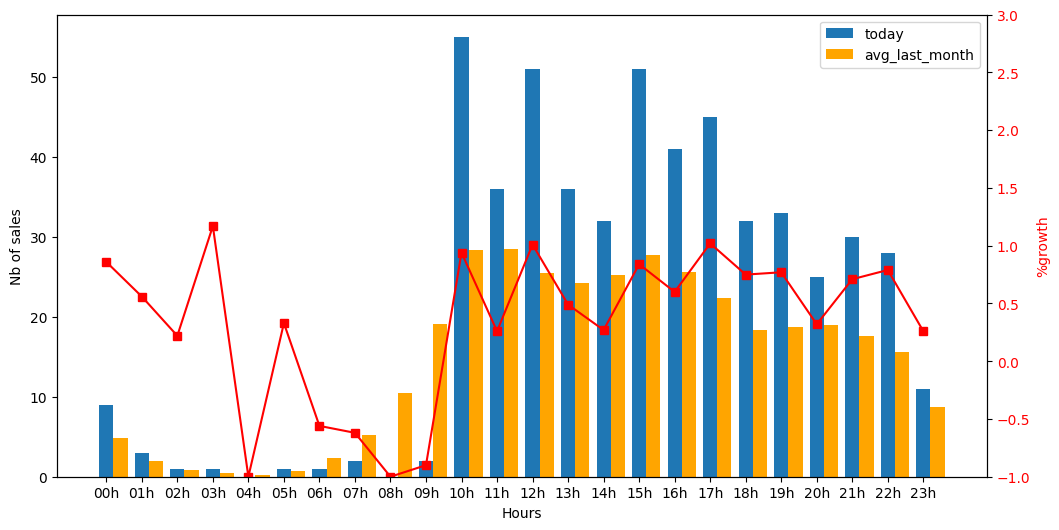

In [11]:
#import graphs library
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax1.set_xlabel('Hours')
ax1.set_ylabel('Nb of sales')
ax1.bar(anomaly1['time'],anomaly1['today'],width=0.4, label='today')
#second bar
x = [i + 0.4 for i, _ in enumerate(anomaly['time'])]
ax1.bar(x, anomaly1['avg_last_month'], width=0.4, label='avg_last_month', color='orange')


ax2= ax1.twinx() #set for same axis x
ax2.set_ylabel("%growth",color = 'red')
ax2.plot(anomaly1['time'],anomaly1['growth'],marker = 's',markersize = 6, color = 'red')
ax2.tick_params(axis='y',labelcolor = 'red')
ax2.set_ylim([-1,3])

ax1.legend()

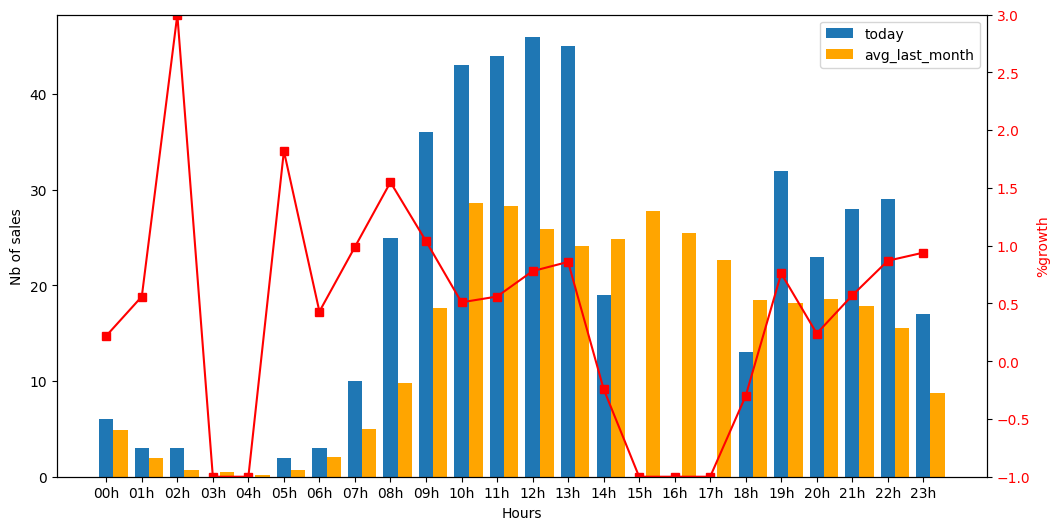

In [12]:
#import graphs library
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax1.set_xlabel('Hours')
ax1.set_ylabel('Nb of sales')
ax1.bar(anomaly['time'],anomaly['today'],width=0.4, label='today')
#second bar
x = [i + 0.4 for i, _ in enumerate(anomaly['time'])]
ax1.bar(x, anomaly['avg_last_month'], width=0.4, label='avg_last_month', color='orange')


ax2= ax1.twinx() #set for same axis x
ax2.set_ylabel("%growth",color = 'red')
ax2.plot(anomaly['time'],anomaly['growth'],marker = 's',markersize = 6, color = 'red')
ax2.tick_params(axis='y',labelcolor = 'red')
ax2.set_ylim([-1,3])

ax1.legend()

**STEP 3 - Anomaly Classification**

---
Classify the anomalies in two cases:    

1.   Anomaly 1 - When today data is missing - Probably an error that must be fixed.
2.   Anomaly 2 - When there is an outlier number

```
SELECT
  *,
  CASE
  WHEN (today=0 or yesterday=0) and avg_last_month<1 THEN '-'
  WHEN today=0 and avg_last_month>10 THEN 'Anomaly1'
  WHEN per_today>1 and avg_last_month>6 THEN 'Anomaly2'
  ELSE '-'
  END as status
FROM
  `checkout-2`
```


**Case 1**

---

Probably a bug because there are no inputs.

In [13]:
bug1 = anomaly1[(anomaly1["status"]=='Anomaly1')]
bug1

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
8,08h,0,1,18,8.71,10.42,-1.0,Anomaly1


In [14]:
bug = anomaly[(anomaly["status"]=='Anomaly1')]
bug

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
15,15h,0,51,42,22.427,27.78,-1.0,Anomaly1
16,16h,0,41,36,21.570,25.53,-1.0,Anomaly1
17,17h,0,45,19,17.710,22.67,-1.0,Anomaly1


**Case 2**

---

An overflow anomaly, which could be an error or a seasonality.

In [15]:
overfloat1 = anomaly1[(anomaly1["status"]=='Anomaly2')]
overfloat1

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
12,12h,51,39,39,27.57,25.42,1.01,Anomaly2
17,17h,45,30,29,20.42,22.28,1.02,Anomaly2


In [16]:
overfloat = anomaly[(anomaly["status"]=='Anomaly2')]
overfloat

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,growth,status
8,08h,25,0,12,3.71,9.82,1.55,Anomaly2
9,09h,36,2,27,10.14,17.64,1.04,Anomaly2


# **Second task**

Monitoring with real time alert with notifications to teams.


*   Recomedantion to 'alert' the anomalies found
*   Query to organize the data on the data
*   A graphic to see the data in real time
*   A model to determine anomalies

- rule-based : define the rules
- Score-base : create a model ML to score the transaciton and make a decision
- Combination of both


---
Alarts required
- if it's `failed` - with problem
- if it's `reversed` - with problem
- if it's `denied`- risk or issuer




**STEP 1 - Data exploration on python - Plot the data**

---
Analyze the number of errors over time.


In [17]:
t1 = pd.read_csv('/content/drive/MyDrive/Monitoring Analyst/transactions_1.csv') #create a dataframe to save the informartion from transactions_1
t1

,time,status,f0_
0,00h 00,approved,9
1,00h 00,denied,6
2,00h 00,refunded,1
3,00h 01,denied,8
4,00h 01,approved,13
...,...,...,...
4229,23h 59,processing,4
4230,23h 59,denied,1
4231,23h 59,backend_reversed,5
4232,23h 59,approved,10


In [18]:
t2 = pd.read_csv('/content/drive/MyDrive/Monitoring Analyst/transactions_2.csv') #create a dataframe to save the informartion from transactions_1
t2

,time,status,count
0,00h 00,reversed,7
1,00h 00,approved,9
2,00h 00,processing,12
3,00h 00,denied,3
4,00h 00,backend_reversed,2
...,...,...,...
3939,23h 57,denied,11
3940,23h 58,denied,4
3941,23h 58,approved,35
3942,23h 59,denied,10


In [19]:
import numpy as np
import seaborn as sns
color_pal = sns.color_palette()

Create a graph function to plot graphs for each type of error transaction.

In [20]:
def graph (filter,df,column):
  select = df["status"] == filter #filter for each type of error
  df = df[(select)] #select only the data for that type of error
  df = df.reset_index(drop=True)
  df_new = df[['time',column]] #show only the columns of time and nb of transactions
  df_new = df_new.set_index("time") #set time as index
  df_new.plot(style = '.',figsize=(15,5),color = color_pal[0]) #plot the graph
  plt.show()
  return df

Filter When is `denied` or `reversed` or `failed`

Denied - Error

---
Transactions-1.csv


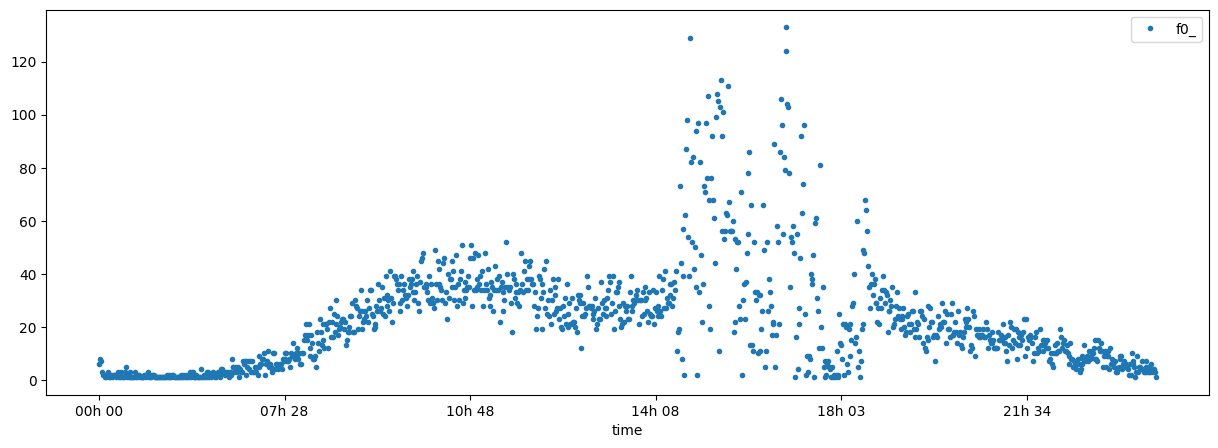

In [21]:
denied = t1
denied = graph('denied',denied,'f0_')

Reversed - Error

---

Transactions-1.csv

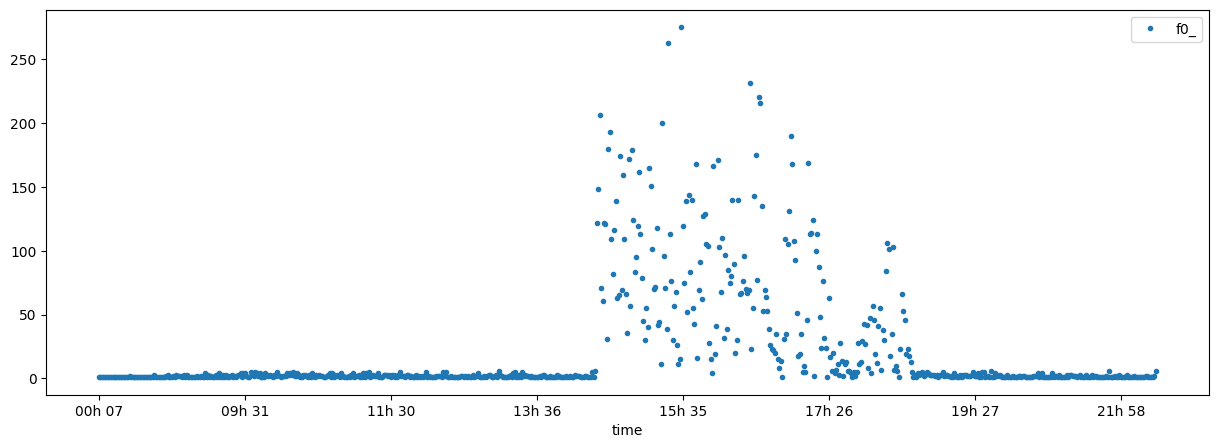

In [22]:
reversed = t1
reversed = graph('reversed',reversed,'f0_')

Failed - Error

---

Transactions-1.csv

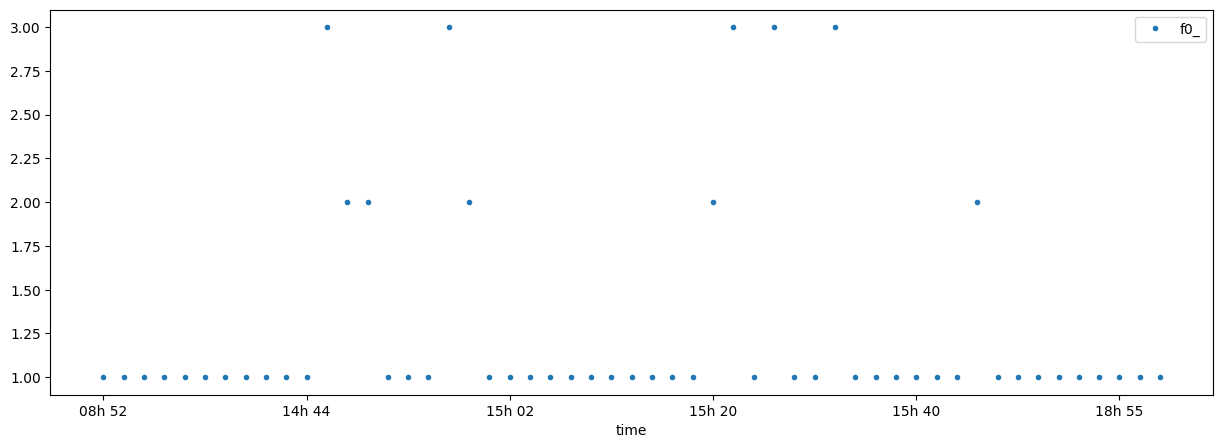

In [23]:
failed = t1
failed = graph('failed',failed,'f0_')

Denied - Error

---
Transactions-2.csv


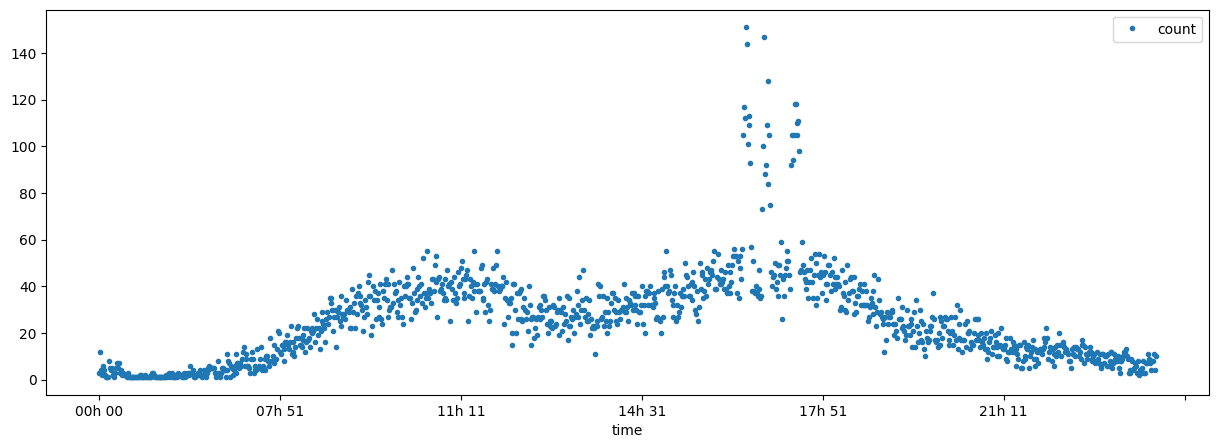

In [24]:
denied_2 = t2
denied_2 = graph('denied',denied_2,'count')

Failed - Error

---
Transactions-2.csv


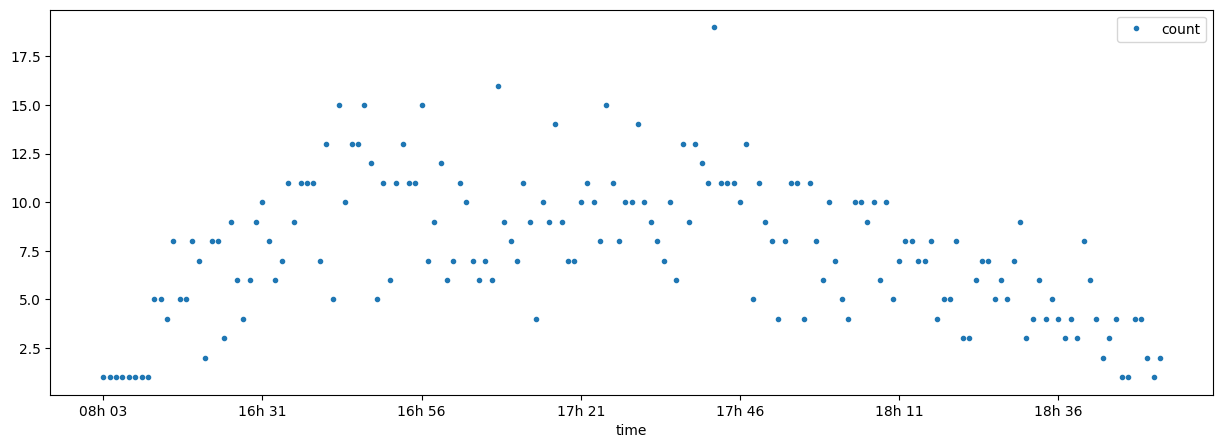

In [25]:
failed_2 = t2
failed_2 = graph('failed',failed_2,'count')

Reversed - Error

---
Transactions-2.csv


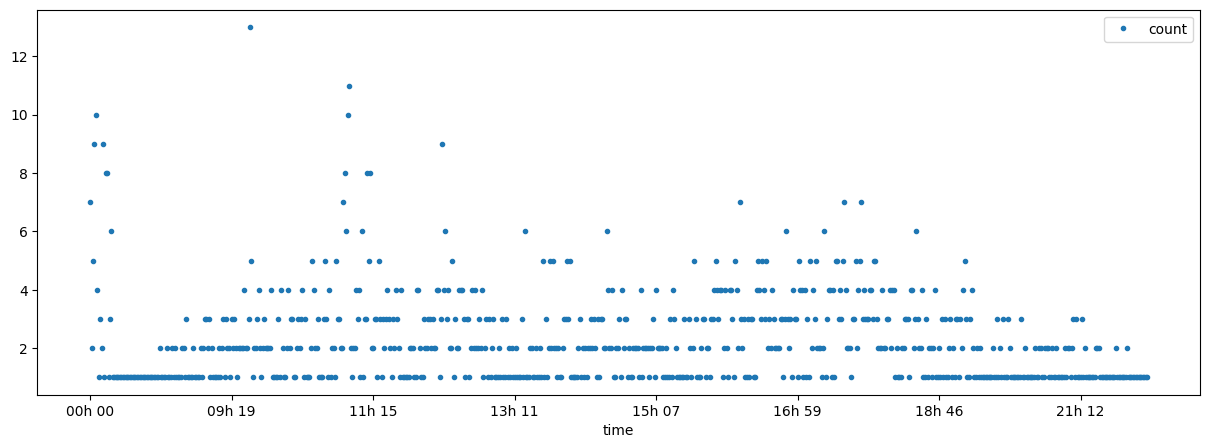

In [26]:
reversed_2 = t2
reversed_2 = graph('reversed',reversed_2,'count')

**STEP 2 - Rule Based - model to predict error**


---

*   In a column, a variable is set to `alarm-1`when there is an increase in the number of error transactions compared to the last 5 minutes or when the number of error transactions is 30% higher than the mean.
*   In a column, a variable is set to `alarm-2`when the number of error transactions is 50% higher than the mean.

In [27]:
def rule_based (column,df):
  df["alarm"] = ""
  mean = df[column].mean()

  #Classify the anomaly as an alarm
  last = df[column].iloc[0:5]
  med = np.mean(last.values)
  u = 0
  for i in df[column]:
    a = df[column].get(u) #get the value of f0_
    if (a > med and a > mean*1.3): #verify if the value is bigger then the list o previus 5 numbers or bigger then the mean
      df.loc[u,"alarm"] = "alarm-1"
    if a > mean*1.5:
      df.loc[u,"alarm"] = "alarm-2"
    u+=1
    last = df[column].iloc[u-1:u+4]
    med = np.mean(last.values)
  return df

Transactions_1.csv

In [28]:
denied = rule_based("f0_",denied)

In [29]:
reversed = rule_based("f0_",reversed)

In [30]:
failed = rule_based("f0_",failed)

Transactions_2.csv

In [31]:
denied_2 = rule_based("count",denied_2)

In [32]:
reversed_2 = rule_based("count",reversed_2)

In [33]:
failed_2 = rule_based("count",failed_2)

**STEP 3 - Message Alert**


---
Send an e-mail with alert message when the number of error transasctions is growing.
*   Send the first email with the alert message, and send the notification again only after 20 minutes if the error persists.
*   Send an alert message if the number of error transactions is twice the mean, and send the notification again only after 20 minutes if the error persists."

In [34]:
import smtplib
from email.message import EmailMessage

Function to connect the e-mail and the message that is going to be sent.

In [35]:
def email_alert(subject,body,to):
  msg = EmailMessage()
  msg.set_content(body)
  msg['subject'] = subject
  msg['to'] = to

  user = "gabrielatoniolob@gmail.com"
  msg['from'] = user
  password = "rekbijqbnbmmwsjw"

  server = smtplib.SMTP('smtp.gmail.com', 587)
  server.starttls()
  server.login(user,password)
  server.send_message(msg)

  server.quit()

#if __name__ == '__main__':
 # subject = "Hey"
 # body = "Hello World"
 # to = "gabrielatonio@hotmail.com"
  #email_alert(subject,body,to)

Function to send the e-mail for each Data Frame

In [36]:
def send_email (df,column,alarm):
  u = 0
  minutes = 0
  min = 0
  mean = df[column].mean()

  #create a column min to control the number of e-mail sent
  df = df.reset_index(drop=True)
  df["min"] = df["time"]
  df["min"] = df["min"].str.split('h ').str[0].astype(int) * 60 + df["min"].str.split('h ').str[1].astype(int)

  for i in df["alarm"]:
    nb = df[column].get(u)
    if i == alarm:
      subject = f'ALERT - Number of {df["status"].get(0)} is getting high' #Subject of the e-mail
      time = df["time"].get(u)
      if df["min"].get(u) > minutes+30: #send an alarm after 30min
        minutes = df["min"].get(u)
        body = f'The number of transactions with status - {df["status"].get(0)} - is increasing. \nAt {time}. \nAtt, \nMonitoring team'
        if df[column].get(u) > mean*2.3:
          body = f"The number of errors is two times bigger than usual. Please verify why the number of transactions with status - {df['status'].get(0)} - is increasing. Time of error:{time} \nAtt. \nMonitoring team"
        #if __name__ == '__main__':
          #to = "gabrielatonio@hotmail.com"
          #email_alert(subject,body,to)


      if df["min"].get(u) > min+20 and (nb > mean*2.3): #send an alarm after 20min or if there was a increase of 70% in the number of cases
        min = df["min"].get(u)
        body = f"The number of errors is two times bigger than usual. Please verify why the number of transactions with status - {df['status'].get(0)} - is increasing. Time of error:{time} \nAtt. \nMonitoring team"

        #if __name__ == '__main__':
          #to = "gabrielatonio@hotmail.com"
          #email_alert(subject,body,to)
    u+=1


Send E-mail for all type of error. (Denied, Failed and Reversed)

---
Transactions_1.csv


In [37]:
send_email(denied,"f0_","alarm-1")
send_email(denied,"f0_","alarm-2")

In [38]:
send_email(reversed,"f0_","alarm-1")
send_email(reversed,"f0_","alarm-2")

In [39]:
send_email(failed,"f0_","alarm-1")
send_email(failed,"f0_","alarm-2")

Transactions_2.csv

In [40]:
send_email(denied_2,"count","alarm-1")
send_email(denied_2,"count","alarm-2")

In [41]:
send_email(reversed_2,"count","alarm-1")
send_email(reversed_2,"count","alarm-2")

In [42]:
send_email(failed_2,"count","alarm-1")
send_email(failed_2,"count","alarm-2")

# **Model with ML**

**Install mode to execute XGBoost model**
Model to predict non linear data.

This model didn't work so well to estimate the future values.

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import xgboost as xgb

In [45]:
t1_denied = denied[["time","f0_"]]
t1_denied = t1_denied.set_index("time")

Types of series data

In [46]:
t1_denied.index

Index(['00h 00', '00h 01', '00h 02', '00h 03', '00h 05', '00h 06', '00h 07',
       '00h 08', '00h 10', '00h 11',
       ...
       '23h 44', '23h 45', '23h 46', '23h 53', '23h 54', '23h 55', '23h 56',
       '23h 57', '23h 58', '23h 59'],
      dtype='object', name='time', length=1140)

In [47]:
t1_denied.index = pd.to_datetime(t1_denied.index, format='%Hh %M') # transforme time to datetype
t1_denied.index = t1_denied.index.strftime('%H:%M')

In [48]:
t1_denied

,f0_
time,
00:00,6
00:01,8
00:02,7
00:03,3
00:05,2
...,...
23:55,4
23:56,3
23:57,4


Train/Test Split

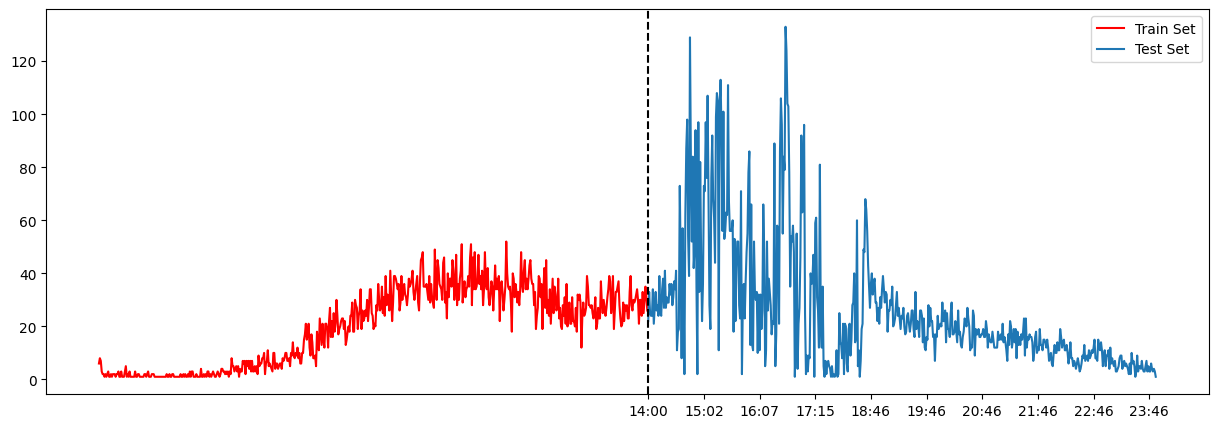

In [49]:
train = t1_denied.loc[t1_denied.index < '14:00'] #separate the values before 16h
test = t1_denied.loc[t1_denied.index >= '14:00'] #separate the values after 16h

#make a plot with subplots
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(train.index,train['f0_'], color = 'red')
ax.plot(test.index,test['f0_'], label = "test")
ax.axvline('14:00',color ='black',ls="--")
ax.legend(["Train Set","Test Set"])

# Ajuste o intervalo (2 horas) conforme necessário
ax.set_xticks(test.index[::60],minor = False)
plt.show()

Create our Model

In [50]:
t1_denied["hour"] = t1_denied.index

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
def minutes (df):
  df["min"] = df.index
  df["min"] = df["min"].str.split(':').str[0].astype(int) * 60 + df["min"].str.split(':').str[1].astype(int)
  return df

train = minutes(train)
test = minutes(test)

TARGET = "f0_"
FEATURES = "min"

<ipython-input-52-f377cd4d35d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["min"] = df.index
<ipython-input-52-f377cd4d35d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["min"] = df["min"].str.split(':').str[0].astype(int) * 60 + df["min"].str.split(':').str[1].astype(int)
<ipython-input-52-f377cd4d35d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [53]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [54]:
reg = xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50)
reg.fit(X_train,y_train,
        eval_set = [(X_train,y_train),(X_test,y_test)],
        verbose=20)

[0]	validation_0-rmse:10.65303	validation_1-rmse:24.83518
[20]	validation_0-rmse:3.63435	validation_1-rmse:24.84625
[40]	validation_0-rmse:3.45210	validation_1-rmse:24.89328
[52]	validation_0-rmse:3.42047	validation_1-rmse:24.90419


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Forcast on Test

In [55]:
test['prediction'] = reg.predict(X_test)

<ipython-input-55-33b5c0e814cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


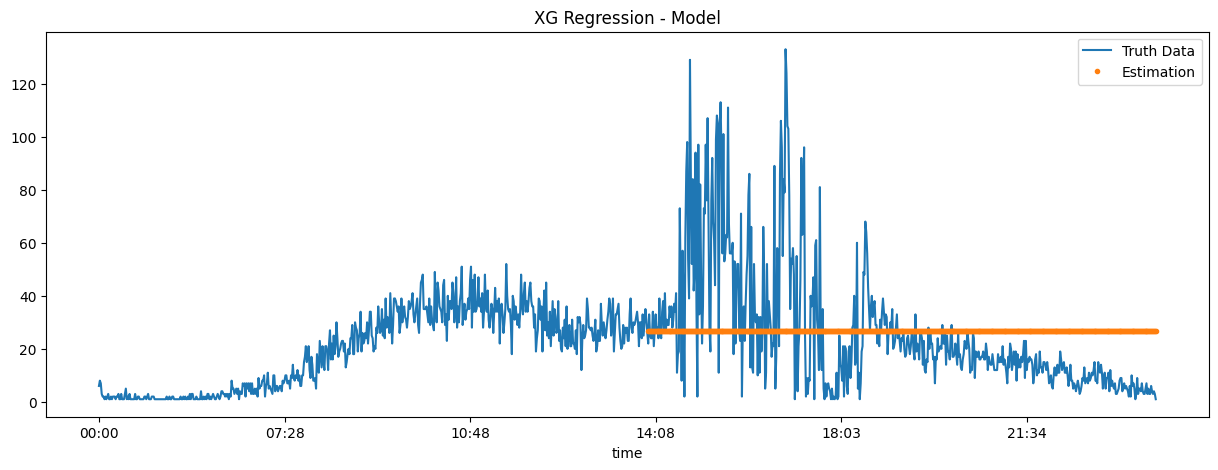

In [56]:
t1_denied = t1_denied.merge(test[['prediction']],how = 'left', left_index = True, right_index= True)

ax = t1_denied[["f0_"]].plot(figsize =(15,5))
t1_denied['prediction'].plot(ax=ax, style='.')
plt.legend(["Truth Data", "Estimation"])
ax.set_title("XG Regression - Model")
plt.show()

This model isn't a good fit for these data.